# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
N = 100
conf_lvl = 0.95

def draw_confidence_interval(
    sample, 
    estimation, 
    conf_int, 
    title, 
    color='green', 
    figsize=(16, 8), 
    ylim=(-500, 500), 
    alpha=0.5
):
    sample_sizes = np.arange(1, N + 1)
    plt.figure(figsize=figsize)
    sns.lineplot(x=sample_sizes, y=estimation, color=color, label=title[0])
    plt.fill_between(x=sample_sizes,
                     y1=conf_int[0], 
                     y2=conf_int[1],
                     alpha=alpha, 
                     color=color,
                     label="доверительный интервал")
    sns.scatterplot(x=sample_sizes, y=sample, color="red", label="выборка")
    plt.xlabel("размер выборки")
    plt.ylabel(title[0])
    plt.ylim(ylim)
    plt.title(f"Доверительный интервал оценки {title[0]} уровня $\\alpha$ = {conf_lvl} у распределения {title[1]}")
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Имеем точный доверительный интервал:
\begin{equation*}
P\left(\frac{X_{( n)}}{\sqrt[n]{\tfrac{1+\alpha }{2}}} < \theta < \frac{X_{( n)}}{\sqrt[n]{\tfrac{1-\alpha }{2}}}\right) =\alpha 
\end{equation*}

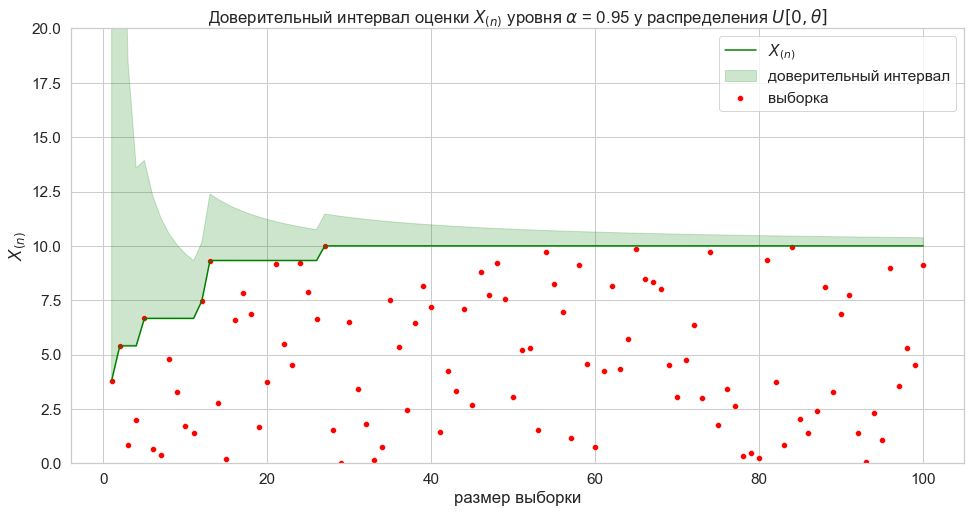

In [3]:
theta = 10
uniform_sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
maximums = np.maximum.accumulate(uniform_sample)
powers = np.arange(1, N + 1)
T_1 = maximums / np.power((1 + conf_lvl) / 2, 1 / powers)
T_2 = maximums / np.power((1 - conf_lvl) / 2, 1 / powers)
draw_confidence_interval(uniform_sample, maximums, (T_1, T_2), ("$X_{(n)}$", "$U[0, \\theta]$"), ylim=(0, 20), alpha=0.2)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Имеем асимптотичский доверительный интервал:
\begin{gather*}
T_{1}^{( n)} =\widehat{\mu _{n}} -\frac{u_{\tfrac{1+\alpha }{2}} \cdotp \pi }{2\sqrt{n}}\\
T_{2}^{( n)} =\widehat{\mu _{n}} -\frac{u_{\tfrac{1-\alpha }{2}} \cdotp \pi }{2\sqrt{n}}
\end{gather*}

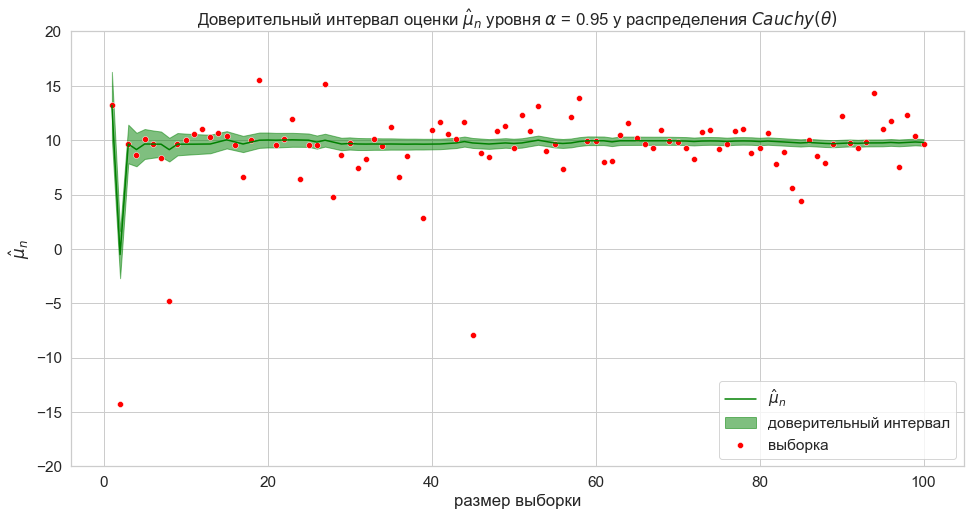

In [4]:
cauchy_sample = sps.cauchy(loc=theta, scale=1).rvs(size=N)

def cummedian(sample):
    return np.vectorize(lambda i: float(np.median(sample[:(i + 1)])))(np.arange(sample.size))

medians = cummedian(cauchy_sample)
u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)
sample_sizes = np.arange(1, N + 1)
T_1 = medians - (u_1 * np.pi) / (2 * np.sqrt(sample_sizes))
T_2 = medians - (u_2 * np.pi) / (2 * np.sqrt(sample_sizes))
draw_confidence_interval(cauchy_sample, medians, (T_1, T_2), ("$\\hat \\mu_{n}$", "$Cauchy(\\theta)$"), ylim=(-20, 20))

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Имеем асимптотичский доверительный интервал:
\begin{gather*}
T_{1}^{( n)} =\overline{X} -u_{\tfrac{1+\alpha }{2}} \cdotp \frac{\sqrt{\overline{X}}}{\sqrt{n}}\\
T_{2}^{( n)} =\overline{X} -u_{\tfrac{1-\alpha }{2}} \cdotp \frac{\sqrt{\overline{X}}}{\sqrt{n}}
\end{gather*}

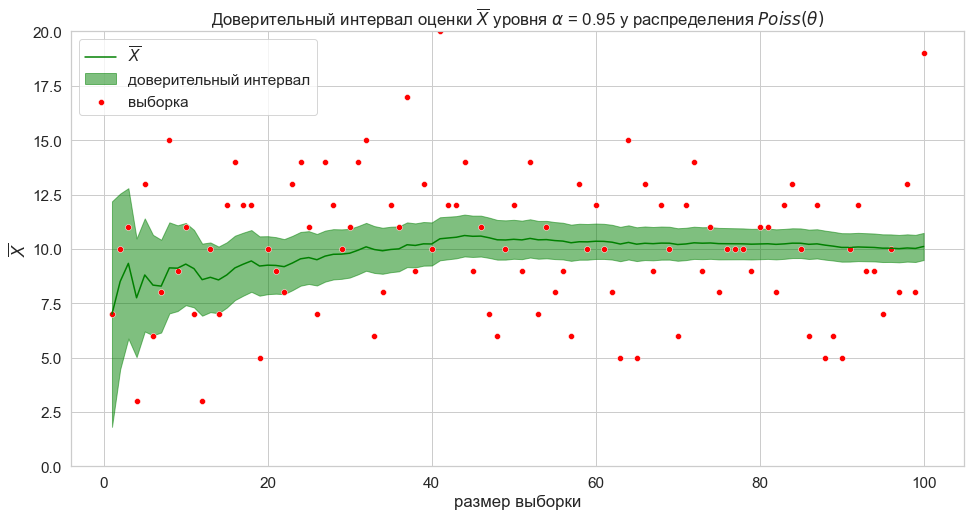

In [5]:
poiss_sample = sps.poisson(mu=theta).rvs(size=N)
u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)

sizes = np.arange(1, N + 1)
means = np.cumsum(poiss_sample) / sizes
T_1 = means - u_1 * (np.sqrt(means) / np.sqrt(sizes))
T_2 = means - u_2 * (np.sqrt(means) / np.sqrt(sizes))
draw_confidence_interval(poiss_sample, means, (T_1, T_2), ("$\\overline{X}$", "$Poiss(\\theta)$"), ylim=(0, 20))

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Имеем асимптотичский доверительный интервал:
\begin{gather*}
T_{1}^{( n)} =\frac{\overline{X}\sqrt{n}}{u_{\tfrac{1-\alpha }{2}}\sqrt{\lambda } +\lambda \sqrt{n}}\\
T_{2}^{( n)} =\frac{\overline{X}\sqrt{n}}{u_{\tfrac{1+\alpha }{2}}\sqrt{\lambda } +\lambda \sqrt{n}}
\end{gather*}

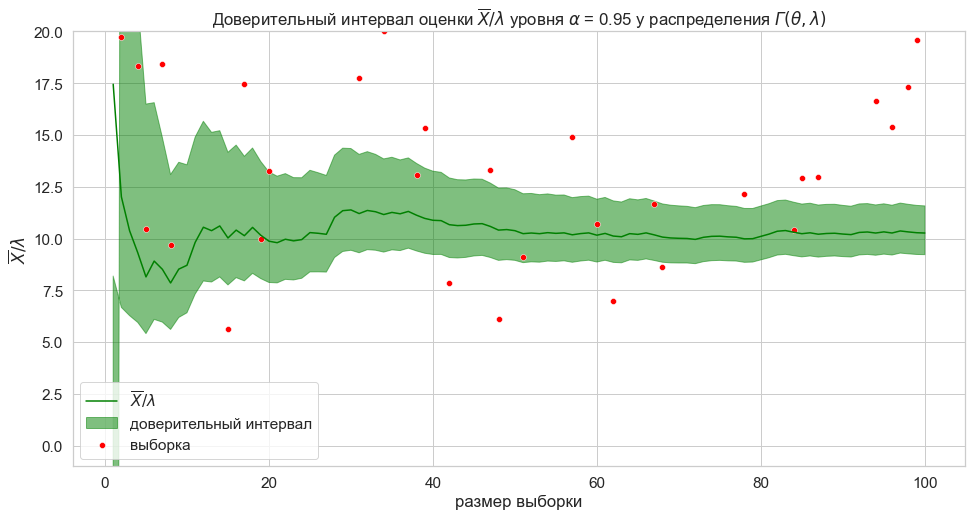

In [6]:
lambd = 3
gamma_sample = sps.gamma(a=lambd, scale=theta).rvs(size=N)

u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)

sizes = np.arange(1, N + 1)
means = np.cumsum(gamma_sample) / sizes

sqrt_n = np.sqrt(sizes)

T_1 = (means * sqrt_n) / (u_1 * np.sqrt(lambd) + lambd * sqrt_n)
T_2 = (means * sqrt_n) / (u_2 * np.sqrt(lambd) + lambd * sqrt_n) 
       

draw_confidence_interval(gamma_sample, 
                         means / lambd, 
                         (T_1, T_2), 
                         ("$\\overline{X} / \\lambda$", "$Г(\\theta, \\lambda)$"), 
                         ylim=(-1, 20))

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

1) $U[0, \theta]$. Нижняя граница довериательного интервала стремится к n-ой порядковой статистике, т.к. там извлекается корень n-ой степени от числа очень близкой к 1. Поэтому в графике не видно нижней части интервала. А верхняя грань изначально намного больше, т.к. делится там на маленькое число, но при стремлении к бесконечности, корень n-ой степени от числа меньше 1 стремится к 1, поэтому в итоге получаем что доверительный интервал сузился до самой оценки. Сужение тут происходит быстрее всех остальных распределений.

2) для распределения Коши имеем симметричный доверительный интервал относительно оценки, что так же видно и по графику, и при стремлении к бесконенчости длина интервала укорачивается и стремится к оценке. Сужение интервала происходит со скоростью $\frac{1}{\sqrt{n}}$.

3) в случае распределения Пуассона все аналогично. Получили постепенно сужающийся симметричный относительно оценки доверительный интервал. Но сужение происходит медленнее.

4) у гамма распределения получили несимметричный но сужающийся тоже дов.интервал.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

Рассмотрим выборку $\displaystyle X_{1} ,\dotsc ,X_{n} \sim \mathbf{Ber}( p)$ и доверительный интервал для $\displaystyle p $ уровня $\displaystyle \gamma $. Заметим, что дисперсию данного рспределения можно оценить сверху 0.25:
\begin{equation*}
DX_{1} =p( 1-p) =p-p^{2} =-\left( p-\frac{1}{2}\right)^{2} +\frac{1}{4} \leqslant \frac{1}{4}
\end{equation*}
. По неравенству Чебышева:
\begin{gather*}
P\left( |\sum X_{i} -np|\leqslant \varepsilon n\right) \geqslant 1-\frac{np( 1-p)}{n^{2} \varepsilon ^{2}} \geqslant 1-\frac{1/4}{n\varepsilon ^{2}} =\gamma \\
\varepsilon =\sqrt{\frac{1}{4n( 1-\gamma )}}\\
P( |\overline{X} -p|\leqslant \varepsilon ) \geqslant \gamma \Longrightarrow P\left(\overline{X} -\sqrt{\frac{1}{4n( 1-\gamma )}} \leqslant p\leqslant \overline{X} +\sqrt{\frac{1}{4n( 1-\gamma )}}\right) \geqslant \gamma 
\end{gather*}
 Возьмем теперь $\displaystyle \gamma =0.99$, и радиус интервала $\displaystyle \varepsilon \leqslant 0.05$. Оценим с такими параметрами размер берноуллиевской выборки:
\begin{gather*}
\varepsilon =\sqrt{\frac{1}{4n( 1-\gamma )}} \leqslant 0.05\Longrightarrow \frac{1}{2\sqrt{n\cdotp \frac{1}{100}}} \leqslant 0.05\Longrightarrow \frac{5}{\sqrt{n}} \leqslant 0.05\Longrightarrow \\
\Longrightarrow \frac{25}{n} \leqslant \frac{25}{10000} \Longrightarrow n\geqslant 10000
\end{gather*}
Итого, если брать количество выборок $\displaystyle \geqslant 10000$. Оценка вероятности попадания истинного значения $\displaystyle \theta $ в довериательный интервал лежит в интервале $\displaystyle ( 0.90,\ 1)$ c вероятностью $\displaystyle \geqslant 0.99$. А также отклонение оценки вероятности от истинного значения вероятности будет $\displaystyle \leqslant 0.05$ c вероятностью $\displaystyle \geqslant 0.99$.

In [7]:
n_samples = 10000

### Равномерное распределение

In [8]:
uni_sample = sps.uniform(loc=0, scale=theta).rvs((n_samples, N))
maximums = np.max(uni_sample, axis=1)
T_1 = maximums / np.power((1 + conf_lvl) / 2, 1 / N)
T_2 = maximums / np.power((1 - conf_lvl) / 2, 1 / N)

np.mean(np.array((T_1 < theta) * (T_2 > theta), dtype='float64'))

0.9473

### Распределение Коши

In [9]:
cauchy_sample = sps.cauchy(loc=theta, scale=1).rvs(size=(n_samples, N))

medians = np.median(cauchy_sample, axis=1)
u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)
T_1 = medians - (u_1 * np.pi) / (2 * np.sqrt(N))
T_2 = medians - (u_2 * np.pi) / (2 * np.sqrt(N))

np.mean(np.array((T_1 < theta) * (T_2 > theta), dtype='float64'))

0.9431

### Распределение Пуассона

In [10]:
poiss_sample = sps.poisson(mu=theta).rvs(size=(n_samples, N))
u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)

means = np.mean(poiss_sample, axis=1)
T_1 = means - u_1 * (np.sqrt(means) / np.sqrt(N))
T_2 = means - u_2 * (np.sqrt(means) / np.sqrt(N))

np.mean(np.array((T_1 < theta) * (T_2 > theta), dtype='float64'))

0.9461

### Гамма-распределение

In [11]:
lambd = 3
gamma_sample = sps.gamma(a=lambd, scale=theta).rvs(size=(n_samples, N))

u_1 = sps.norm.ppf((1 + conf_lvl) / 2)
u_2 = sps.norm.ppf((1 - conf_lvl) / 2)

means = np.mean(gamma_sample, axis=1)

T_1 = (means * np.sqrt(N)) / (u_1 * np.sqrt(lambd) + lambd * np.sqrt(N))
T_2 = (means * np.sqrt(N)) / (u_2 * np.sqrt(lambd) + lambd * np.sqrt(N))

np.mean(np.array((T_1 < theta) * (T_2 > theta), dtype='float64'))

0.9493

Сделайте выводы.

__Вывод:__ Мы проверили что построенные нами доверительные интервалы реально имеют уровень доверия $\approx 0.95$.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

Точный доверительный интервал выглядит вот так:
\begin{gather*}
T_{1} =\overline{X} -\frac{\sqrt{S^{2}}}{\sqrt{n-1}} t_{\tfrac{1+\alpha }{2}}\\
T_{2} =\overline{X} -\frac{\sqrt{S^{2}}}{\sqrt{n-1}} t_{\tfrac{1-\alpha }{2}}
\end{gather*}
где, $\displaystyle t_{\gamma }$ - квантиль распределения $\displaystyle T_{n-1}$ и $\displaystyle S^{2} =\overline{X^{2}} -\overline{X}^{2}$

А асимптотический доверительный интервал выглядит:
\begin{gather*}
T_{1}^{( n)} =\overline{X} -\frac{\sqrt{S^{2}}}{\sqrt{n}} u_{\tfrac{1+\alpha }{2}}\\
T_{2}^{( n)} =\overline{X} -\frac{\sqrt{S^{2}}}{\sqrt{n}} u_{\tfrac{1-\alpha }{2}}
\end{gather*}
где $\displaystyle u_{\gamma }$ - квантиль $\displaystyle \mathcal{N}( 0,1)$.

In [12]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    N = np.arange(1, sample.size + 1)[1:]
    t_1 = sps.t.ppf(q=(1 + alpha) / 2, df=(N - 1))
    t_2 = sps.t.ppf(q=(1 - alpha) / 2, df=(N - 1))
    cummean = np.cumsum(sample)[1:] / N
    cumvar = np.cumsum(np.square(sample))[1:] / N - np.square(cummean)
    T_1 = cummean - np.sqrt(cumvar / (N - 1)) * t_1
    T_2 = cummean - np.sqrt(cumvar / (N - 1)) * t_2
    return (T_1, T_2)

In [13]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    N = np.arange(1, sample.size + 1)[1:]
    u_1 = sps.norm.ppf((1 + alpha) / 2)
    u_2 = sps.norm.ppf((1 - alpha) / 2)
    cummean = np.cumsum(sample)[1:] / N
    cumvar = np.cumsum(np.square(sample))[1:] / N - np.square(cummean)
    T_1 = cummean - np.sqrt(cumvar / N) * u_1
    T_2 = cummean - np.sqrt(cumvar / N) * u_2
    return (T_1, T_2)

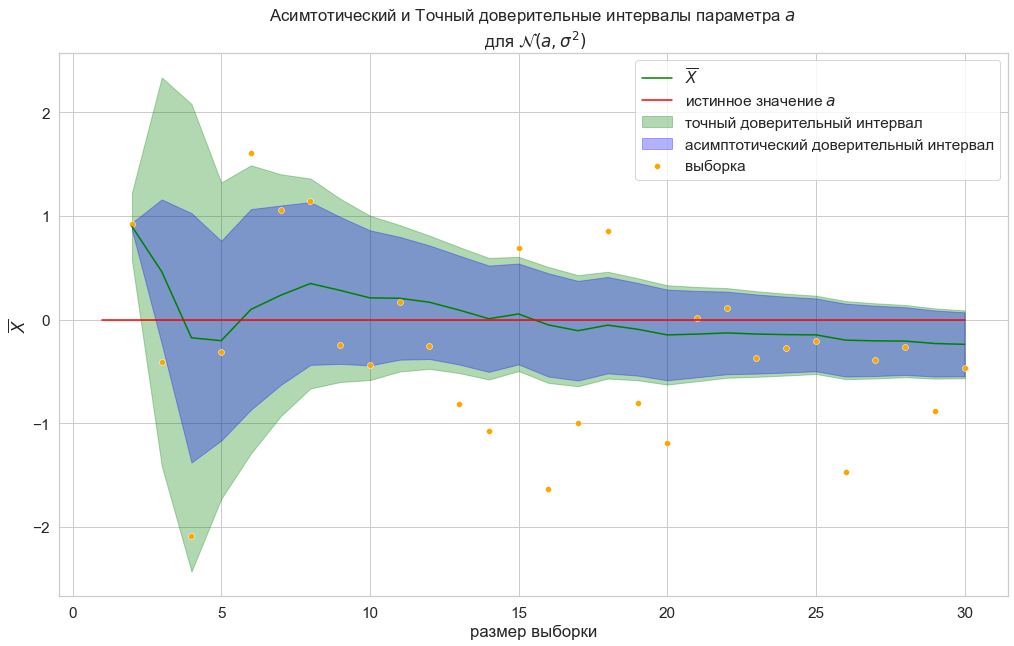

In [14]:
N = 30
a = 0
norm_sample = sps.norm.rvs(size=N)
sizes = np.arange(2, N + 1)
estim = np.cumsum(norm_sample)[1:] / sizes
exact_conf = calculate_conf_interval(norm_sample)
asymp_conf = calculate_asymptotic_conf_interval(norm_sample)
plt.figure(figsize=(17, 10))
sns.lineplot(x=sizes, y=estim, color="green", label="$\\overline{X}$")
plt.fill_between(x=sizes,
                 y1=exact_conf[0], 
                 y2=exact_conf[1],
                 alpha=0.3, 
                 color="green",
                 label="точный доверительный интервал")
plt.fill_between(x=sizes,
                 y1=asymp_conf[0], 
                 y2=asymp_conf[1],
                 alpha=0.3, 
                 color="blue",
                 label="асимптотический доверительный интервал")
sns.scatterplot(x=sizes, y=norm_sample[1:], color="orange", label="выборка")
sns.lineplot(x=[1, N], y=[a, a], color="red", label="истинное значение $a$")
plt.xlabel("размер выборки")
plt.ylabel("$\\overline{X}$")
plt.title("Асимтотический и Точный доверительные интервалы параметра $a$ \n для $\\mathcal{N}(a,\\sigma^2)$")
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

__Вывод:__ наблюдаем вначале сильно изменяющийся точный доверительный интервал, т.к. квантили распределения Стьюдента каждый раз пересчитываем с новыми степенями свободы. А асимптотический доверительный интервал сужается очень медленно. В итоге оба интфервала почти совпали. Но если исходить от того что асимптотический доверительный интервал требует только квантили стандартого нормального распределения которые константы, то он предпочтительнее в плане вычислений.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [15]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: E:\Mumtozbek\Statistics_practice\city_day.csv

  0%|          | 0.00/2.57M [00:00<?, ?B/s]
 20%|##        | 524k/2.57M [00:00<00:00, 3.16MB/s]
 61%|######1   | 1.57M/2.57M [00:00<00:00, 4.35MB/s]
 81%|########1 | 2.10M/2.57M [00:00<00:00, 4.46MB/s]
100%|##########| 2.57M/2.57M [00:00<00:00, 4.04MB/s]
100%|##########| 2.57M/2.57M [00:00<00:00, 4.09MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [16]:
data = pd.read_csv('city_day.csv', parse_dates=True)[['City', 'Date', 'AQI']].dropna().drop_duplicates()
data.head()

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [17]:
dti = pd.DatetimeIndex(data['Date'])
data['Year'] = dti.year
data['Month'] = dti.month
data.head(10)

,City,Date,AQI,Year,Month
28,Ahmedabad,2015-01-29,209.0,2015,1
29,Ahmedabad,2015-01-30,328.0,2015,1
30,Ahmedabad,2015-01-31,514.0,2015,1
31,Ahmedabad,2015-02-01,782.0,2015,2
32,Ahmedabad,2015-02-02,914.0,2015,2
33,Ahmedabad,2015-02-03,660.0,2015,2
34,Ahmedabad,2015-02-04,294.0,2015,2
35,Ahmedabad,2015-02-05,149.0,2015,2
36,Ahmedabad,2015-02-06,190.0,2015,2
37,Ahmedabad,2015-02-07,247.0,2015,2


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [18]:
tmp_mumbai = data[data['City'] == 'Mumbai']
tmp_kolkata = data[data['City'] == 'Kolkata']

mumbai = tmp_mumbai[pd.DatetimeIndex(tmp_mumbai['Date']) >= pd.to_datetime('2018-07-01')]
kolkata = tmp_kolkata[pd.DatetimeIndex(tmp_kolkata['Date']) >= pd.to_datetime('2018-07-01')]
mumbai.shape, kolkata.shape

((721, 5), (732, 5))

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [19]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    return df[(df['Year'] == year) & (df['Month'] == month)]

In [20]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    np.random.seed(42)
    indices = sps.randint.rvs(low=0, high=sample.size, size=(k, sample.size))
    return sample[indices]

In [21]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    k = 1000
    bt_samples = get_bootstrap_samples(sample, k=k)
    estim = np.sort(estimator(bt_samples))
    q_1 = int(np.floor(k * (1 + alpha) / 2))
    q_2 = int(np.floor(k * (1 - alpha) / 2))
    return np.sort((estim[q_1], estim[q_2]))

In [22]:
years = [2018, 2019, 2020]
months = np.arange(1, 13)

mumbai_CI = []
kolkata_CI = []
mumbai_means = []
kolkata_means = []

for year in years:
    for month in months:
        if (year == 2018 and month < 7) or (year == 2020 and month > 6):
            continue
        mumbai_sample = mumbai[(mumbai['Year'] == year) & (mumbai['Month'] == month)]['AQI'].values
        mumbai_CI.append(bootstrap_conf_interval(mumbai_sample))
        mumbai_means.append(np.mean(mumbai_sample))
        kolkata_sample = kolkata[(kolkata['Year'] == year) & (kolkata['Month'] == month)]['AQI'].values
        kolkata_CI.append(bootstrap_conf_interval(kolkata_sample))
        kolkata_means.append(np.mean(kolkata_sample))
mumbai_CI = np.array(mumbai_CI)
kolkata_CI = np.array(kolkata_CI)

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

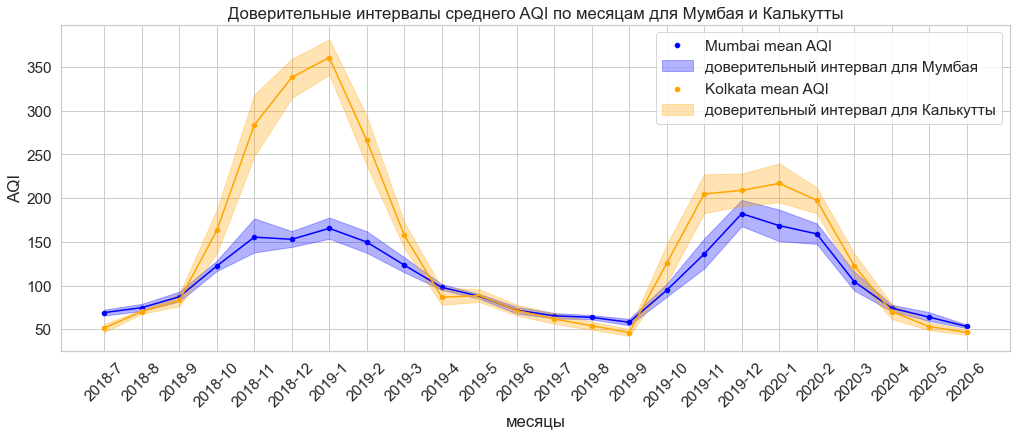

In [23]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

sizes = np.arange(1, len(mumbai_CI) + 1)

plt.figure(figsize=(17, 6))
sns.lineplot(x=sizes, y=mumbai_means, color='blue')
sns.scatterplot(x=sizes, y=mumbai_means, color='blue', label="Mumbai mean AQI")
plt.fill_between(x=sizes,
                 y1=mumbai_CI[:, 0],
                 y2=mumbai_CI[:, 1],
                 color="blue", 
                 alpha=0.3,
                 label="доверительный интервал для Мумбая")

sns.lineplot(x=sizes, y=kolkata_means, color='orange')
sns.scatterplot(x=sizes, y=kolkata_means, color='orange', label="Kolkata mean AQI")
plt.fill_between(x=sizes,
                 y1=kolkata_CI[:, 0],
                 y2=kolkata_CI[:, 1],
                 color="orange", 
                 alpha=0.3,
                 label="доверительный интервал для Калькутты")
plt.legend()
plt.xticks(labels=labels, ticks=sizes, rotation=45)
plt.xlabel("месяцы")
plt.ylabel("AQI")
plt.title("Доверительные интервалы среднего AQI по месяцам для Мумбая и Калькутты")
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

__Наблюдение:__ Можем заметить сильное ухудшение качества воздуха зимой в обоих городах. Но оно становится намного хуже в Калькутте по сравнению с Мумбаем. Дело в том что средняя температура в январе в Мумбае +18, а в Калькутте +12. А эта температура для граждан живущих в тех городах считается уже низким и они начинают топить. Из-за этого и ухудшается качество воздуха. Но кроме зимы ситуация в обоих городах более-менее одинаковая.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

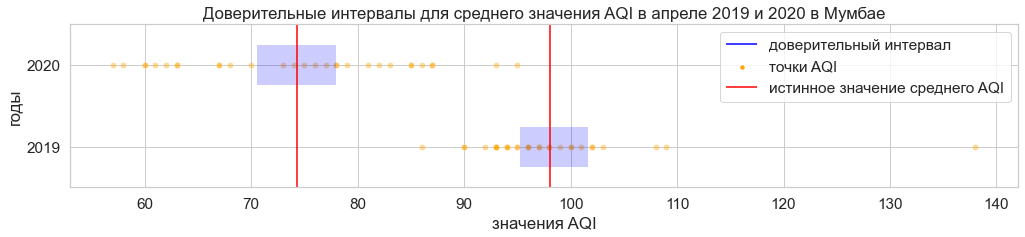

In [24]:
sample_2019 = mumbai[(mumbai['Year'] == 2019) & (mumbai['Month'] == 4)]['AQI'].values
sample_2020 = mumbai[(mumbai['Year'] == 2020) & (mumbai['Month'] == 4)]['AQI'].values
ci_2019 = bootstrap_conf_interval(sample_2019)
ci_2020 = bootstrap_conf_interval(sample_2020)

plt.figure(figsize=(17, 3))
plt.hlines(y=[0, 0.2], 
           xmin=[ci_2019[0], ci_2020[0]], 
           xmax=[ci_2019[1], ci_2020[1]], 
           color="blue", 
           alpha=0.2, 
           linewidths=40, 
           label='доверительный интервал')
sns.scatterplot(y=np.zeros(sample_2019.shape), x=sample_2019, color="orange", label='точки AQI', alpha=0.4)
sns.scatterplot(y=np.ones(sample_2020.shape) * 0.2, x=sample_2020, color="orange", alpha=0.4)
plt.vlines(x=[np.mean(sample_2019), np.mean(sample_2020)], 
           ymin=-1, 
           ymax=0.3, 
           color="red", 
           label='истинное значение среднего AQI')
plt.ylim((-0.1, 0.3))
plt.yticks(labels=[2019, 2020], ticks=[0, 0.2])
plt.ylabel("годы")
plt.xlabel("значения AQI")
plt.title("Доверительные интервалы для среднего значения AQI в апреле 2019 и 2020 в Мумбае")

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)
    handle.set_linewidth(1.5)
plt.show()

Теперь проделайте то же самое для Калькутты

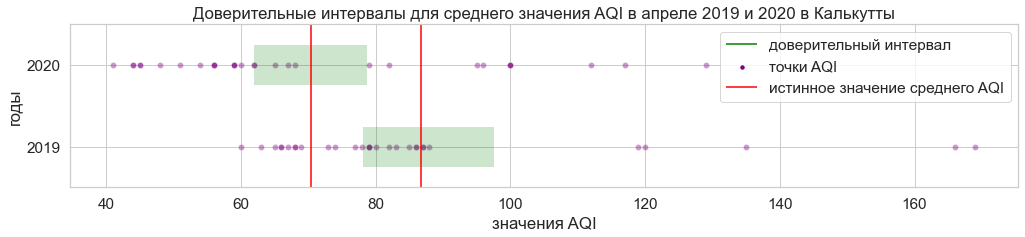

In [25]:
sample_2019 = kolkata[(kolkata['Year'] == 2019) & (kolkata['Month'] == 4)]['AQI'].values
sample_2020 = kolkata[(kolkata['Year'] == 2020) & (kolkata['Month'] == 4)]['AQI'].values
ci_2019 = bootstrap_conf_interval(sample_2019)
ci_2020 = bootstrap_conf_interval(sample_2020)

plt.figure(figsize=(17, 3))
plt.hlines(y=[0, 0.2], 
           xmin=[ci_2019[0], ci_2020[0]], 
           xmax=[ci_2019[1], ci_2020[1]], 
           color="green", 
           alpha=0.2, 
           linewidths=40, 
           label='доверительный интервал')
sns.scatterplot(y=np.zeros(sample_2019.shape), x=sample_2019, color="purple", label='точки AQI', alpha=0.4)
sns.scatterplot(y=np.ones(sample_2020.shape) * 0.2, x=sample_2020, color="purple", alpha=0.4)
plt.vlines(x=[np.mean(sample_2019), np.mean(sample_2020)], 
           ymin=-1, 
           ymax=0.3, 
           color="red", 
           label='истинное значение среднего AQI')
plt.ylim((-0.1, 0.3))
plt.yticks(labels=[2019, 2020], ticks=[0, 0.2])
plt.ylabel("годы")
plt.xlabel("значения AQI")
plt.title("Доверительные интервалы для среднего значения AQI в апреле 2019 и 2020 в Калькутты")

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)
    handle.set_linewidth(1.5)
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

__Вывод:__ как видно по графикам, в Калькутте в апреле качество воздуха лучше чем в Мумбае.
Если смотреть на длину интервала, то в Калькутте они шире, потому что как видим у нее имеются выбросы которые заставляют среднюю оценку скакать, из-за этого чтобы с точностью 95% оценить среднее качество воздуха, нужно взять пошире доверительный интервал. А у Мумбая точки более сосредоточены в одном месте, вокруг истинного значения среднего, поэтому там более узкого доверительного интервала достаточно для 95% уверенности.